# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [1]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diab = load_diabetes()


####  데이터셋에 대한 설명 및 정보 확인

In [4]:
# 데이터셋 정보확인

In [4]:
print(diab.DESCR) #이미 스케일링 되어 있음을 확인할 것

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [6]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### 데이터프레임 변환

In [8]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [5]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인

diab_df = pd.DataFrame(diab.data, columns = diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
diab_df.shape

(442, 10)

In [7]:
diab_df.info() # 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
diab_df['measure'] = diab.target
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


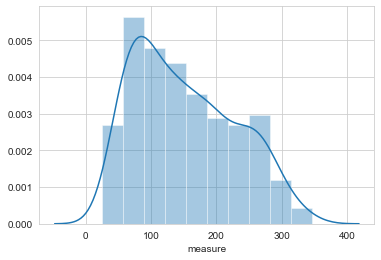

In [9]:
import seaborn as sns
sns.set_style('whitegrid')
f = sns.distplot(diab_df['measure'])


In [10]:
# X(독립변수), Y(종속변수) 분할
X = diab_df.drop(['measure'], axis=1)
y = diab_df['measure']

In [11]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [12]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=(diab.feature_names) + ["score"])

In [13]:
#각 모델별, 규제강도별 평가지표 저장
diab.feature_names + ["score"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'score']

In [14]:
comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


# 1. 규제가 없는 선형모델

In [15]:
#모델 구축 및 학습
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

#모델 평가
y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 회귀 계수 확인
coef = pd.Series(model_LR.coef_, index=X_test.columns)

print("R2: {:.3f} \n".format(r2))
print(coef)

R2: 0.477 

age     29.250346
sex   -261.707681
bmi    546.297373
bp     388.400773
s1    -901.953387
s2     506.761149
s3     121.148459
s4     288.029325
s5     659.271338
s6      41.375369
dtype: float64


- 계수값 시각화

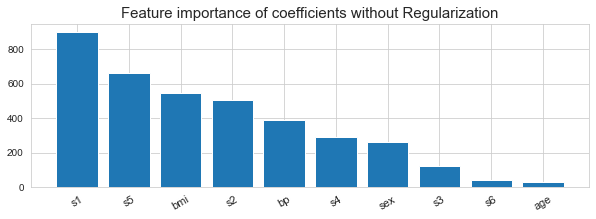

In [16]:
#절대값으로 만듬
coef = pd.Series(data=np.abs(model_LR.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients without Regularization', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [17]:
# 모델별 비교 데이터프레임 열 추가
comp_df['LR'] = np.append(model_LR.coef_, r2 )
comp_df

,LR
age,29.250346
sex,-261.707681
bmi,546.297373
bp,388.400773
s1,-901.953387
s2,506.761149
s3,121.148459
s4,288.029325
s5,659.271338
s6,41.375369


# 1. 릿지 모델

In [18]:
from sklearn.linear_model import Ridge

In [19]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
model_Ridge1 = Ridge(alpha=1)
# a=1일때 회귀 계수 확인
model_Ridge1.fit(X_train, y_train)

Ridge(alpha=1)

In [21]:
# 선형 모델 평가
y_pred = model_Ridge1.predict(X_test)

r2 = r2_score(y_test,y_pred)

# alpha=1 릿지 모델 회귀 계수
coef = pd.Series(model_Ridge1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

R2: 0.423
age     45.053767
sex    -71.947551
bmi    280.715875
bp     195.213699
s1      -2.229433
s2     -17.541159
s3    -148.688994
s4     120.467093
s5     198.614859
s6     106.934534
dtype: float64


- 계수값 시각화

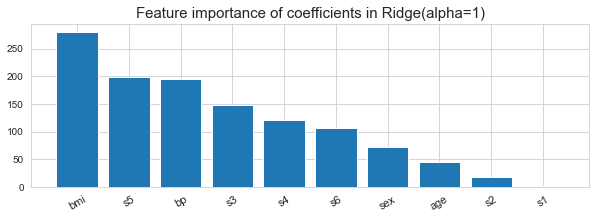

In [22]:
coef = pd.Series(data=np.abs(model_Ridge1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in Ridge(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

#영향을 미치는 크기의 순서도 다르고 상관값도 낮아진다.

In [25]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list =[0.01,1,10,100]
for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(X_train, y_train)
    
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    
    col_name ='Ridge(alpha{:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Ridge.coef_,r2)
comp_df

# 규제강도가 커질수록 회귀계수 작아짐

,LR,Ridge(alpha0.01),Ridge(alpha1.00),Ridge(alpha10.00),Ridge(alpha100.00)
age,29.250346,34.164603,45.053767,16.230871,2.072848
sex,-261.707681,-254.044322,-71.947551,-2.961374,-0.003808
bmi,546.297373,550.842404,280.715875,59.524146,6.899915
bp,388.400773,379.130249,195.213699,43.421500,5.085125
s1,-901.953387,-404.246797,-2.229433,13.875065,2.069660
s2,506.761149,123.024271,-17.541159,10.865253,1.743747
s3,121.148459,-99.046718,-148.688994,-37.495849,-4.508876
s4,288.029325,215.029206,120.467093,38.728531,4.902421
s5,659.271338,463.843218,198.614859,49.224775,5.926497
s6,41.375369,50.350550,106.934534,34.737979,4.328698


# 2. 라쏘 모델

In [27]:
# 라쏘 선형회귀 모델 평가(alpha=1)
from sklearn.linear_model import Lasso

# alpha =1
model_lasso1 = Lasso(alpha=1)

model_lasso1.fit(X_train, y_train)

Lasso(alpha=1)

In [33]:
# 선형 모델 평가
y_pred = model_lasso1.predict(X_test)

r2 = r2_score(y_test,y_pred)

# alpha=1 라쏘 모델 회귀 계수
coef = pd.Series(model_lasso1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

R2: 0.362
age      0.000000
sex     -0.000000
bmi    443.702165
bp      51.603401
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s5     201.967127
s6       0.000000
dtype: float64


- 계수 시각화

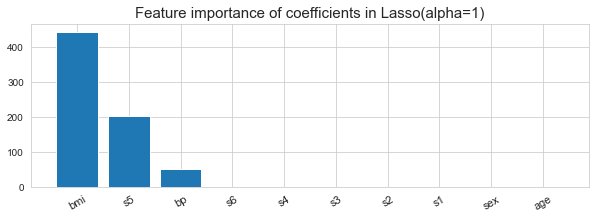

In [32]:
coef = pd.Series(data=np.abs(model_lasso1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in Lasso(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [34]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list =[0.01,1,10,100]
for alpha in alpha_list:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    
    y_pred = model_lasso.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    
    col_name ='Lasso(alpha{:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_lasso.coef_,r2)
comp_df

# 규제강도가 커질수록 회귀계수 작아지고 0을 가지는 회귀계수가 증가함

,LR,Ridge(alpha0.01),Ridge(alpha1.00),Ridge(alpha10.00),Ridge(alpha100.00),Lasso(alpha0.01),Lasso(alpha1.00),Lasso(alpha10.00),Lasso(alpha100.00)
age,29.250346,34.164603,45.053767,16.230871,2.072848,28.243511,0.000000,0.000000,0.000000
sex,-261.707681,-254.044322,-71.947551,-2.961374,-0.003808,-250.820194,-0.000000,0.000000,0.000000
bmi,546.297373,550.842404,280.715875,59.524146,6.899915,556.213504,443.702165,0.000000,0.000000
bp,388.400773,379.130249,195.213699,43.421500,5.085125,380.662908,51.603401,0.000000,0.000000
s1,-901.953387,-404.246797,-2.229433,13.875065,2.069660,-468.724831,0.000000,0.000000,0.000000
s2,506.761149,123.024271,-17.541159,10.865253,1.743747,166.982612,0.000000,0.000000,0.000000
s3,121.148459,-99.046718,-148.688994,-37.495849,-4.508876,-60.228572,-0.000000,-0.000000,-0.000000
s4,288.029325,215.029206,120.467093,38.728531,4.902421,230.910912,0.000000,0.000000,0.000000
s5,659.271338,463.843218,198.614859,49.224775,5.926497,492.632152,201.967127,0.000000,0.000000
s6,41.375369,50.350550,106.934534,34.737979,4.328698,43.968404,0.000000,0.000000,0.000000


# 3. 엘라스틱넷 모델

In [38]:
from sklearn.linear_model import ElasticNet
# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
model_elastic1 = ElasticNet(alpha=1, l1_ratio=0.5)
model_elastic1.fit(X_train, y_train)

ElasticNet(alpha=1)

In [39]:
#모델 평가 및 회귀 계수 확인
# 엘라스틱넷 모델 평가
# 선형 모델 평가
y_pred = model_elastic.predict(X_test)

r2 = r2_score(y_test,y_pred)

# alpha=1, l1_ratio=.5 엘라스틱넷 모델 회귀 계수
coef = pd.Series(model_elastic1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

R2: 0.003
age    0.367567
sex    0.000000
bmi    3.512046
bp     2.328663
s1     0.380194
s2     0.168337
s3    -1.955958
s4     2.228128
s5     2.887428
s6     1.846225
dtype: float64


- 계수 시각화

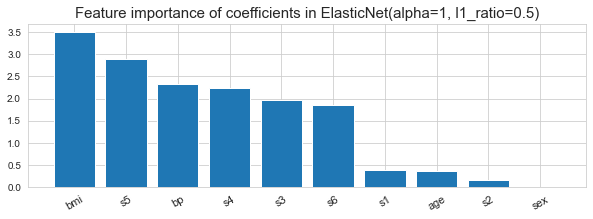

In [42]:
coef = pd.Series(data=np.abs(model_elastic1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in ElasticNet(alpha=1, l1_ratio=0.5)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [43]:
# alpha_list=[0.01, 1, 10, 100]인 경우, L1_ratio=0.5로 고정(default일 때 l1_ratio=0.5)

alpha_list =[0.01,1,10,100]
for alpha in alpha_list:
    model_elastic = ElasticNet(alpha=alpha)
    model_elastic.fit(X_train, y_train)
    
    y_pred = model_elastic.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    
    col_name ='Elastic(alpha{:.2f}, l1_ratio=0.5)'.format(alpha)
    comp_df[col_name] = np.append(model_elastic.coef_,r2)
comp_df

# 규제강도가 커질수록 회귀계수 작아지고 0을 가지는 회귀계수가 증가함

,LR,Ridge(alpha0.01),Ridge(alpha1.00),Ridge(alpha10.00),Ridge(alpha100.00),Lasso(alpha0.01),Lasso(alpha1.00),Lasso(alpha10.00),Lasso(alpha100.00),"Elastic(alpha0.01, l1_ratio=0.5)","Elastic(alpha1.00, l1_ratio=0.5)","Elastic(alpha10.00, l1_ratio=0.5)","Elastic(alpha100.00, l1_ratio=0.5)"
age,29.250346,34.164603,45.053767,16.230871,2.072848,28.243511,0.000000,0.000000,0.000000,41.417724,0.367567,0.000000,0.000000
sex,-261.707681,-254.044322,-71.947551,-2.961374,-0.003808,-250.820194,-0.000000,0.000000,0.000000,-45.935113,0.000000,0.000000,0.000000
bmi,546.297373,550.842404,280.715875,59.524146,6.899915,556.213504,443.702165,0.000000,0.000000,225.053239,3.512046,0.000000,0.000000
bp,388.400773,379.130249,195.213699,43.421500,5.085125,380.662908,51.603401,0.000000,0.000000,158.163986,2.328663,0.000000,0.000000
s1,-901.953387,-404.246797,-2.229433,13.875065,2.069660,-468.724831,0.000000,0.000000,0.000000,9.020973,0.380194,0.000000,0.000000
s2,506.761149,123.024271,-17.541159,10.865253,1.743747,166.982612,0.000000,0.000000,0.000000,-1.762251,0.168337,0.000000,0.000000
s3,121.148459,-99.046718,-148.688994,-37.495849,-4.508876,-60.228572,-0.000000,-0.000000,-0.000000,-124.240088,-1.955958,-0.000000,-0.000000
s4,288.029325,215.029206,120.467093,38.728531,4.902421,230.910912,0.000000,0.000000,0.000000,106.910019,2.228128,0.000000,0.000000
s5,659.271338,463.843218,198.614859,49.224775,5.926497,492.632152,201.967127,0.000000,0.000000,165.006394,2.887428,0.000000,0.000000
s6,41.375369,50.350550,106.934534,34.737979,4.328698,43.968404,0.000000,0.000000,0.000000,97.213373,1.846225,0.000000,0.000000


In [44]:
# 보기 불편하니 transform 해주기
comp_df.T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,score
LR,29.250346,-261.707681,546.297373,388.400773,-901.953387,506.761149,121.148459,288.029325,659.271338,41.375369,0.477292
Ridge(alpha0.01),34.164603,-254.044322,550.842404,379.130249,-404.246797,123.024271,-99.046718,215.029206,463.843218,50.350550,0.477674
Ridge(alpha1.00),45.053767,-71.947551,280.715875,195.213699,-2.229433,-17.541159,-148.688994,120.467093,198.614859,106.934534,0.423345
Ridge(alpha10.00),16.230871,-2.961374,59.524146,43.421500,13.875065,10.865253,-37.495849,38.728531,49.224775,34.737979,0.151566
Ridge(alpha100.00),2.072848,-0.003808,6.899915,5.085125,2.069660,1.743747,-4.508876,4.902421,5.926497,4.328698,0.014770
Lasso(alpha0.01),28.243511,-250.820194,556.213504,380.662908,-468.724831,166.982612,-60.228572,230.910912,492.632152,43.968404,0.478716
Lasso(alpha1.00),0.000000,-0.000000,443.702165,51.603401,0.000000,0.000000,-0.000000,0.000000,201.967127,0.000000,0.361899
Lasso(alpha10.00),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.006405
Lasso(alpha100.00),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.006405
"Elastic(alpha0.01, l1_ratio=0.5)",41.417724,-45.935113,225.053239,158.163986,9.020973,-1.762251,-124.240088,106.910019,165.006394,97.213373,0.384438


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [45]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성

cv = 5
max_iter = 5000
alpha_list = np.arange(0.01, 10, 0.1)


In [46]:
alpha_list

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])

- 모델 학습

In [47]:
model_Lasso = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model_Lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91]),
        cv=5, max_iter=5000, n_jobs=-1, random_state=1)

In [48]:
model_Lasso.alpha_

0.01